In [24]:
#importing libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [25]:
#fetch images count from folders
count =0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/' + dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has '+ str(count) + ' Images')

daisy Folder has 764 Images
dandelion Folder has 1052 Images
Lotus Folder has 1000 Images
rose Folder has 788 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 5321 Images


In [26]:
#Load Images into Arrays as Dataset


In [27]:
base_dir = 'Images/'
img_size=180
batch = 32


In [28]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split = 0.2,
                                                       subset = 'training',
                                                       batch_size = batch,
                                                       image_size = (img_size, img_size))
val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       batch_size = batch,
                                                       image_size = (img_size, img_size))

Found 5321 files belonging to 6 classes.
Using 4257 files for training.
Found 5321 files belonging to 6 classes.
Using 1064 files for validation.


In [29]:
flower_names = train_ds.class_names
flower_names

['Lotus', 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [30]:
import matplotlib.pyplot as plt

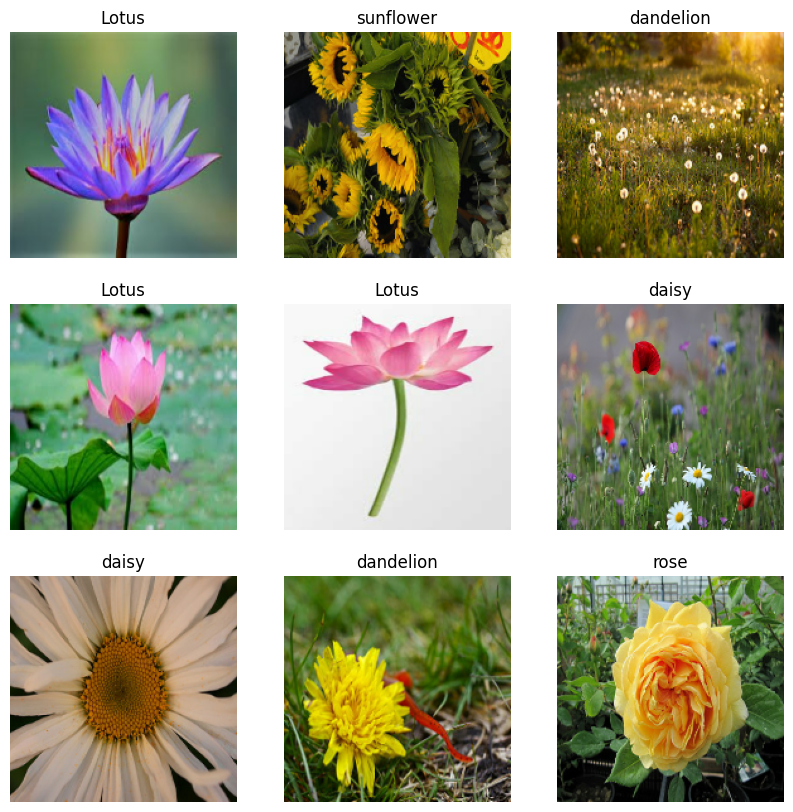

In [31]:
i=0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [32]:
AUTOTUNE = tf.data.AUTOTUNE

In [33]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size =AUTOTUNE)

In [34]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [35]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

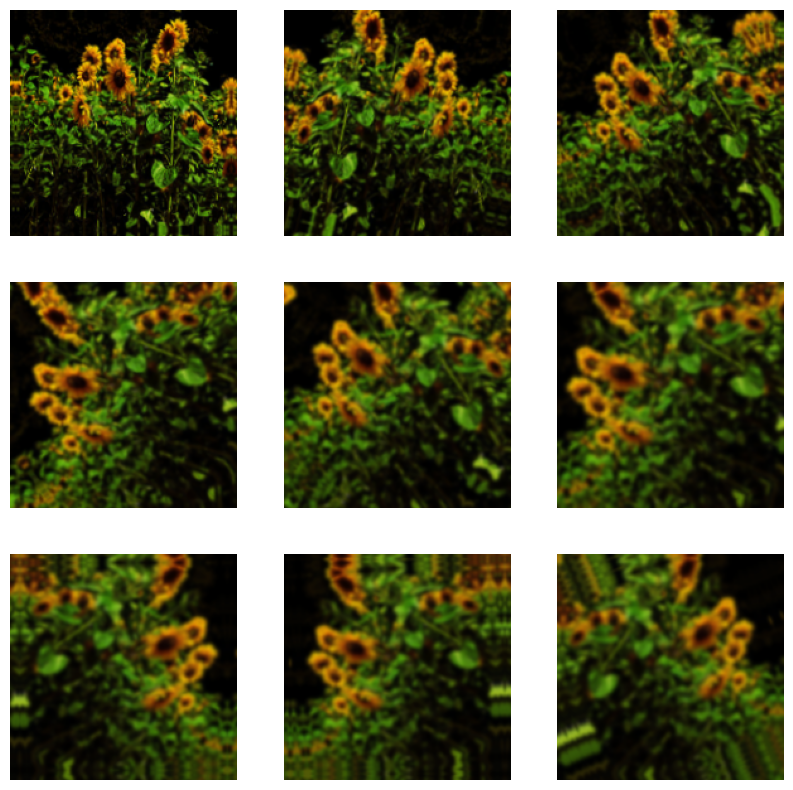

In [36]:
i=0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [37]:
#Model Creation


In [38]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15


134/134 ━━━━━━━━━━━━━━━━━━━━ 81s 563ms/step - accuracy: 0.3609 - loss: 1.5666 - val_accuracy: 0.5395 - val_loss: 1.1729
Epoch 2/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 70s 512ms/step - accuracy: 0.5559 - loss: 1.1508 - val_accuracy: 0.5865 - val_loss: 1.1036
Epoch 3/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 69s 515ms/step - accuracy: 0.6056 - loss: 1.0528 - val_accuracy: 0.6043 - val_loss: 1.0744
Epoch 4/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 66s 495ms/step - accuracy: 0.6466 - loss: 0.9568 - val_accuracy: 0.6175 - val_loss: 1.0059
Epoch 5/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 67s 503ms/step - accuracy: 0.6513 - loss: 0.9192 - val_accuracy: 0.6363 - val_loss: 0.9125
Epoch 6/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 72s 537ms/step - accuracy: 0.6812 - loss: 0.8528 - val_accuracy: 0.6513 - val_loss: 0.9009
Epoch 7/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 69s 516ms/step - accuracy: 0.6991 - loss: 0.8137 - val_accuracy: 0.6842 - val_loss: 0.8550
Epoch 8/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 70s 525ms/step - accuracy: 0.7014 - loss: 0.7885 - val

In [57]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome
# ------------------------------------------------------------------------------

# def classify_images(image_path):
#     input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
#     input_image_array = tf.keras.utils.img_to_array(input_image)
#     input_image_exp_dim = tf.expand_dims(input_image_array, 0)

#     predictions = model.predict(input_image_exp_dim)
#     result = tf.nn.softmax(predictions[0])
#     max_confidence = np.max(result) * 100

#     if max_confidence >= 75:
#         outcome = 'The image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(max_confidence)
#     else:
#         outcome = 'Image not found'

#     return outcome



In [58]:
classify_images('Sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


'The Image belongs to rose with a score of 82.03065991401672'

In [59]:
# model.save('Flower_Recog_Model.h5')
# model.save_weights('Flower_Recog_Model_weights.h5')
model.save('Flower_Recog_Model.keras')